## Nematic

In [711]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import pandas as pd
out = pd.DataFrame(columns=('strain','strain-rate','stress'))

In [712]:
n = 15000
t_final = 50
dt = t_final / n
#
#  Initial conditions.
#
t = np.linspace ( 0.0, t_final, n + 1 )

x = np.zeros ( n + 1 )
y = np.zeros ( n + 1 )
z = np.zeros ( n + 1 )
w = np.zeros ( n + 1 )
k = np.zeros ( n + 1 )
m = np.zeros ( n + 1 )

x[0] = 0.0 #Q11
y[0] = 0.0 #Q12
z[0] = 0.0 #Q13
w[0] = 0.0 #Q22
k[0] = 0.0 #Q23
m[0] = 0.0 #Q33

In [733]:
beta = 30
phi = 0.01
Dea = 1
xi = 1
Wi = 10
De = 1
lamb = 1
eta = 0.01

s = Wi * np.cos(De * t)
e = (Wi/De) * np.sin(De * t)

In [734]:
    def rk4vec ( t0, m, u0, dt, f ):
        f0 = f ( t0, m, u0 )
        t1 = t0 + dt / 2.0
        u1 = u0 + dt * f0 / 2.0
        f1 = f ( t1, m, u1 )

        t2 = t0 + dt / 2.0
        u2 = u0 + dt * f1 / 2.0
        f2 = f ( t2, m, u2 )
    
        t3 = t0 + dt
        u3 = u0 + dt * f2
        f3 = f ( t1, m, u1 )

        u = u0 + dt * ( f0 + 2.0 * f1 + 2.0 * f2 + f3 ) / 6.0

        return u

In [735]:
def lorenz_rhs ( t, m, xyz ):
    
    dxdt = np.zeros ( 6 )
    dxdt[0] = beta * phi * (- Dea*xyz[0] + (2 - xi) * Wi * np.cos(De * t) * xyz[1])                                    #q11
    dxdt[1] = beta * phi * (- Dea*xyz[1] + Wi * np.cos(De * t)*(xyz[3] - xi/2* xyz[0] - xi/2*xyz[3] + lamb/2) + (2* eta * Wi* np.cos(De * t))) #q12
    dxdt[2] = beta * phi * (- Dea*xyz[2] + (1 - xi) * Wi * np.cos(De * t) * xyz[4])                                       #q13
    dxdt[3] = beta * phi * (- Dea* xyz[3] - xi * Wi * np.cos(De * t) * xyz[1])                            #q22
    dxdt[4] = beta * phi * (- Dea* xyz[4] - xi * Wi * np.cos(De * t) * xyz[2])                            #q23
    dxdt[5] = beta * phi * (- Dea* xyz[5])                             #q33

    # Q11 - 0, Q12 - 1, Q13 - 2, Q22 - 3, Q23 - 4, Q33 - 5
    return dxdt

In [736]:
                for j in range ( 0, n ):

                    xyz = np.array ( [ x[j], y[j], z[j], w[j] , k[j] , m[j]  ] )
                    xyz = rk4vec ( t[j], 3, xyz, dt, lorenz_rhs )
    

                    x[j+1] = xyz[0]
                    y[j+1] = xyz[1]
                    z[j+1] = xyz[2]
                    w[j+1] = xyz[3]
                    k[j+1] = xyz[4]
                    m[j+1] = xyz[5]


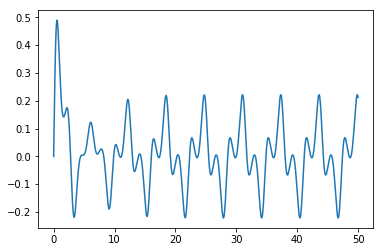

In [737]:
y2 = y[13000:]
e2 = e[13000:]
s2 = s[13000:]
t2 = t[13000:]

#xizero = np.loadtxt('s.out', delimiter=',', unpack=True)
#xizero = np.savetxt('s.out',y2,fmt='%.18e', delimiter=' ')

#a = y2
#yy = y2
#fig, ax = plt.subplots()

#ax.tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)
plt.plot(t,y)

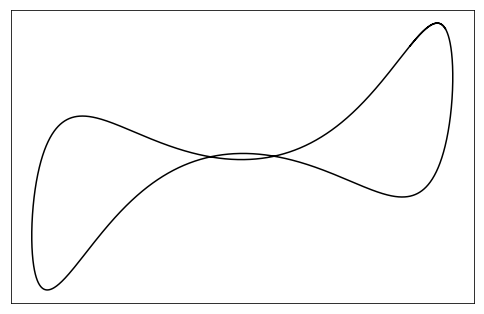

In [738]:
plt.figure(figsize=(8.3, 5.4))
plt.plot(s2,y2,color='k')
#plt.plot(s2,xizero,color='k', linestyle='--', dashes=(1, 4))
#plt.xlim([-1.2,1.2])
#plt.autoscale()
plt.tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)

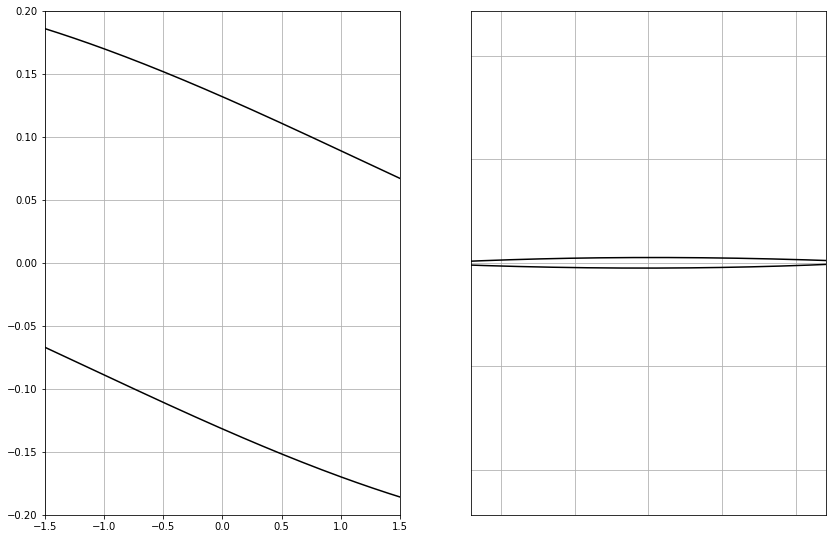

In [739]:
#fig, ax = plt.subplots()


#ax.plot(s2,y2,color='k')
#ax.plot(s2,a,'r','+')
#ax.tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)

plt.figure(figsize=(14, 14))
ax = plt.subplot(121)
#plt.plot(s2, xizero, 'k', linestyle='--', dashes=(1, 32))
plt.plot(e2, y2, 'k')
plt.xlim([-1.5,1.5])
plt.ylim([-0.2,0.2])
plt.grid()
#plt.tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)

plt.subplot(122)

#plt.plot(e2, xizero,'k',linestyle='--',dashes=(2, 30))
plt.plot(s2, y2, 'k')
plt.xlim([-1.2,1.2])
plt.subplots_adjust(bottom=0.25, top=0.75)
plt.grid()
plt.tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)
plt.show()


/home/sarinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


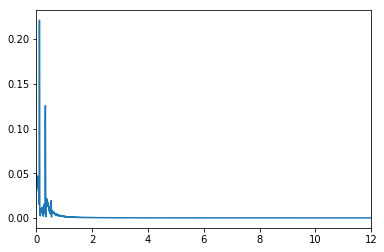

In [746]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
N = 15000
# sample spacing
T = 1.0 / 100.0
yf = scipy.fftpack.dct(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim([0,12])
plt.show()

In [748]:
max(2.0/N * np.abs(yf))

0.22111084697064315